# Red Wine Quality Prediction Project

# Project Description
**The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).**

**This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.**


# Attribute Information

**Input variables (based on physicochemical tests):
1==>fixed acidity
2==>volatile acidity
3==>citric acid
4==>residual sugar
5==>chlorides
6==>free sulfur dioxide
7==>total sulfur dioxide
8==>density
9==>pH
10==>sulphates
11==>alcohol
Output variable (based on sensory data):
12==>quality (score between 0 and 10)**


# Problem Statement

**To Determine which physiochemical properties make a wine 'good'!**

In [78]:
#Importing the necessory libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import joblib

from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier ,AdaBoostClassifier,BaggingClassifier

from sklearn import metrics  
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [79]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")

In [80]:
df.head(20) #Displaying the first 20 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [81]:
df.tail(20)  #Displaying the last 20 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1580,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1584,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6
1588,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6


**==>This dataset contains the details of making a RED WINE**

**==>This dataset have both numerical and categorical data**

**==>In this Dataset,"quality" is the target variable but it contains more than two categorical data(3,4,5,..) so,we have to turn it into binary classification which mentioned on problem statement(7 or higher getting classified as 'good/1' and the remainder as 'not good/0')**

**We have To Determine which physiochemical properties make a wine 'good'!**

# Exploratory Data Analysis (EDA)(Non Graphical Analysis)



In [82]:
df.shape #checking the dimension of the dataset

(1599, 12)

**Data set contains 1599 rows and 12 Columns(from this 1 column is target variable ,then others are independent variables)**

In [83]:
print(f"Columns Names:{df.columns}") #columns of the dataset

Columns Names:Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [84]:
df.dtypes #data types of the data

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**This dataset contains 11 float64 value columns and 1 int64(that is our target variable)**

In [85]:
#Checking the null values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**There are no null values we can see it clearly**

In [86]:
df.isnull().sum().sum() #Total sum of non-null values

0

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Once again we can see There are no null values present in this dataset**

<Axes: >

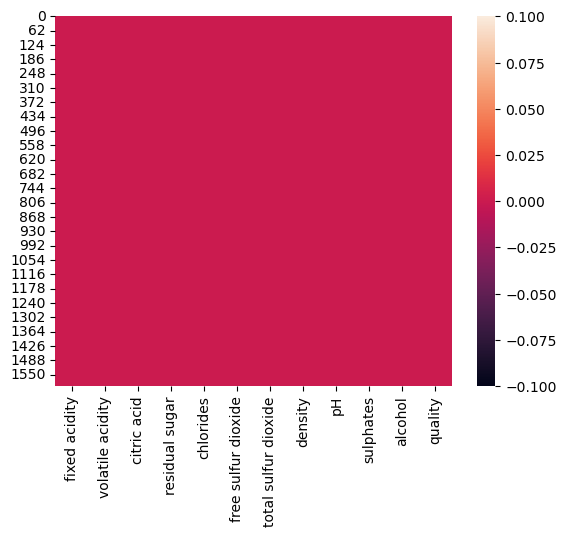

In [88]:
#Let's visualize using heatmap
sns.heatmap(df.isnull())

In [89]:
df["quality"].unique() #checking unique variable for quality

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [90]:
df["quality"].nunique() #total number of unique values 

6

**Target variable contains 6 different categories we have to convert it into two categories based on promblem statement**

In [91]:
for i in df.columns:
    print(df[i].value_counts()) #cheching the value count of each column
    print('\n')

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64


residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64


chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12

In [92]:
df.nunique().to_frame("No. of unique Values")

,No. of unique Values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


**from this we can say all are continuos data(numerical data) except target variable(categorical data)**

In [93]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [94]:
df["quality"].nunique() #total number of unique value in quality column

6

In [95]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**There is no negative value present**

**There is no missing values**

**The mean value is greater than the median(50%) in fixed acidity,volatile acidity,critic acid,residual sugar,chlorides,free sulfer dioxide,total sulfar dioxide,pH,sulphates and alcohol columns which means the data is skewed to right.**

**The data in the column density have mean value less than median which means the data is right skewed**

**By summarizing the data we can observe there is a huge difference between 75% and max hence there are outliers presented in the data**


**we can also notice the standard deviation,min,25% percentile value from this describe method**

**ignore the quality column because it is our target variable(categorical column)**

# Data Visulisation(Grapical Analysis)

## Univarite Analysis(for quality column)

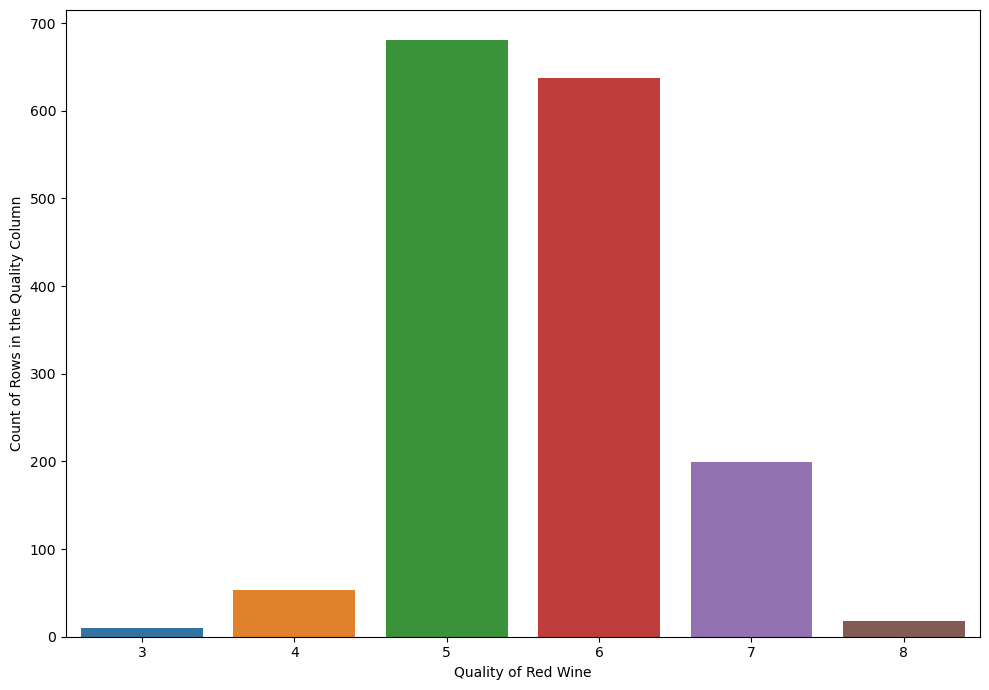

In [96]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='quality',data=df)
plt.xlabel("Quality of Red Wine")
plt.ylabel("Count of Rows in the Quality Column")
plt.tight_layout()

**We can see 5 and 6 have more numbers when compared to others ,it looks like our data are imbalanced that will affect our model performance.**

# Bivariate Analysis(comparing each feature with target variable or label)

In [97]:
target_variable=df['quality']
features=df.drop('quality',axis=1)

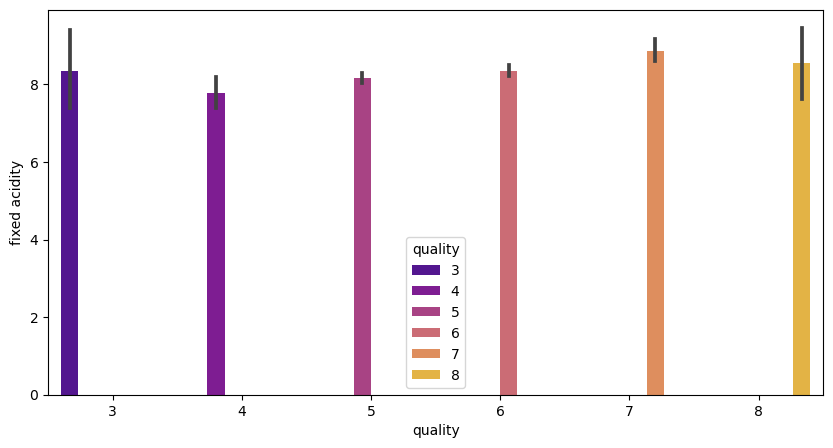

In [98]:
plt.figure(figsize=(10,5))
sns.barplot(x=target_variable,y=features['fixed acidity'],data=df,palette='plasma',hue=target_variable)
plt.show()

### From above Analysis 1) Fixed acidity Vs quality=patterns are almost same

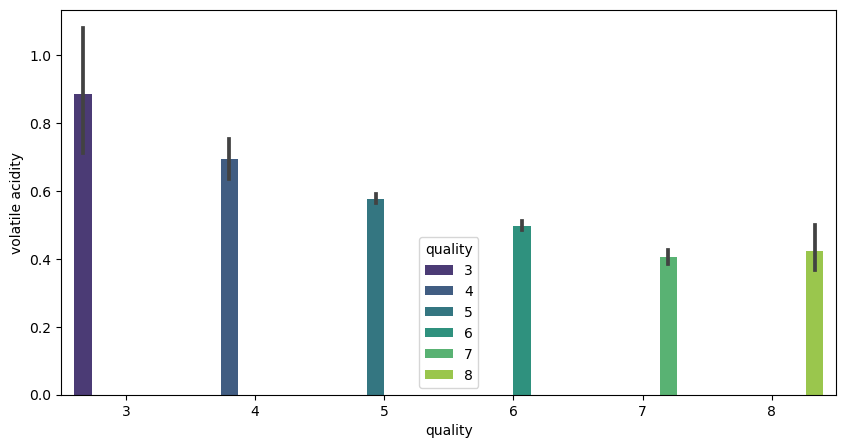

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(x=target_variable,y=features['volatile acidity'],data=df,palette='viridis',hue=target_variable)
plt.show()

### From above Analysis 2) volatile acidity Vs quality=there is decreasing trend

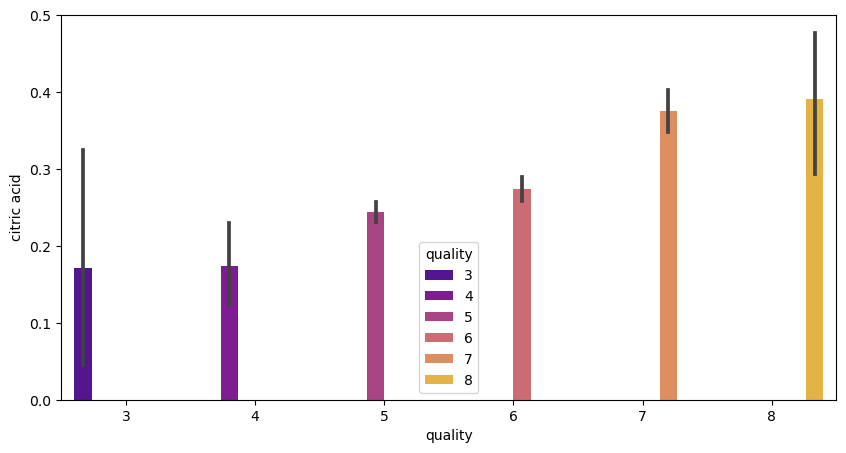

In [100]:
plt.figure(figsize=(10,5))
sns.barplot(x=target_variable,y=features['citric acid'],data=df,palette='plasma',hue=target_variable)
plt.show()

### From above Analysis 3) critic acid Vs quality=there is increasing trend

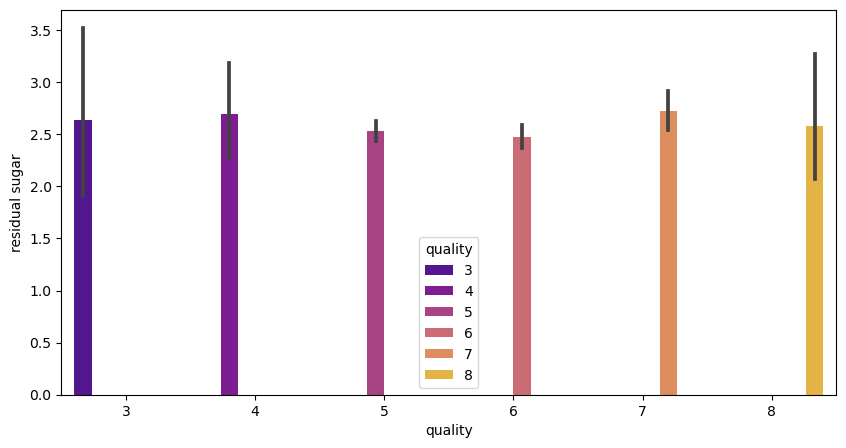

In [101]:
plt.figure(figsize=(10,5))
sns.barplot(x=target_variable,y=features['residual sugar'],data=df,palette='plasma',hue=target_variable)
plt.show()

### From above Analysis 4) residual sugar Vs quality=patterns are almost same

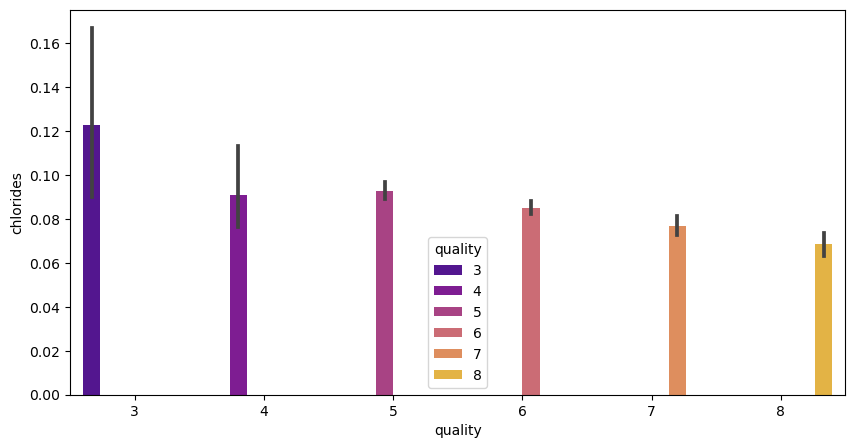

In [102]:
plt.figure(figsize=(10,5))
sns.barplot(x=target_variable,y=features['chlorides'],data=df,palette='plasma',hue=target_variable)
plt.show()

### From above Analysis 5) chlorides Vs quality=there is decreasing trend

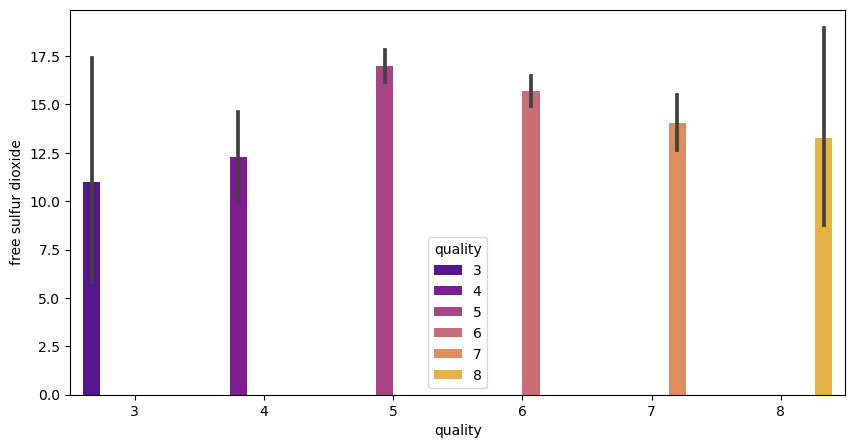

In [103]:
plt.figure(figsize=(10,5))
sns.barplot(x=target_variable,y=features['free sulfur dioxide'],data=df,palette='plasma',hue=target_variable)
plt.show()

### From above Analysis 6) free sulfar dioxide Vs quality=patterns are increasing then its decreasing

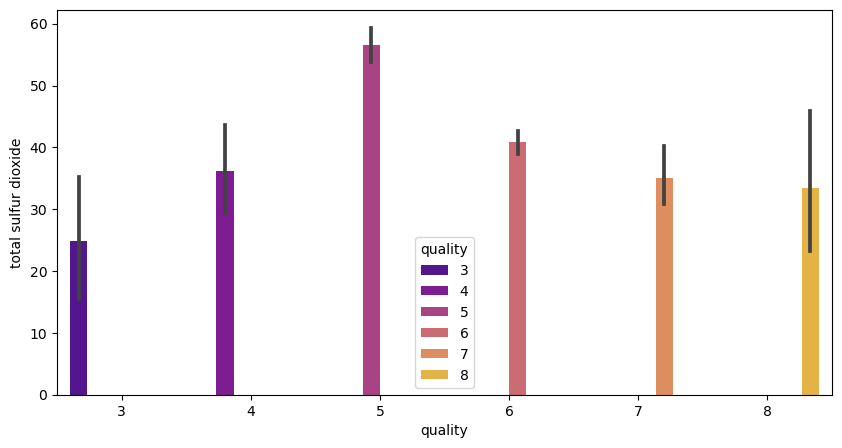

In [104]:
plt.figure(figsize=(10,5))
sns.barplot(x=target_variable,y=features['total sulfur dioxide'],data=df,palette='plasma',hue=target_variable)
plt.show()

### From above Analysis 7) total sulfar dioxide Vs quality=patterns are increasing then its decreasing

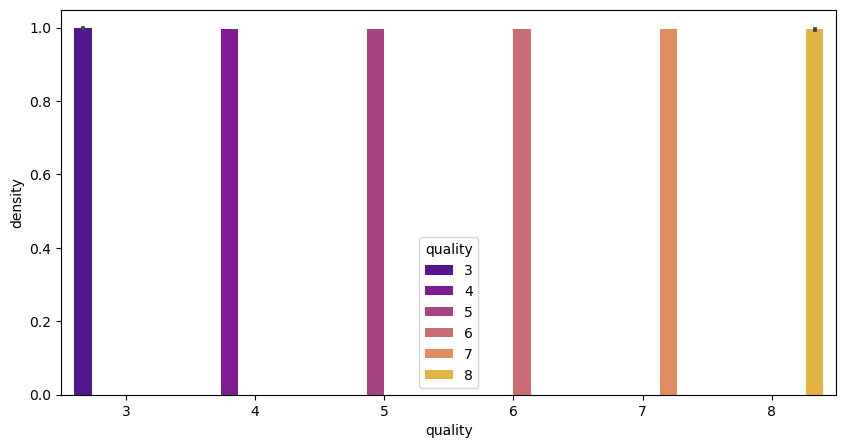

In [105]:
plt.figure(figsize=(10,5))
sns.barplot(x=target_variable,y=features['density'],data=df,palette='plasma',hue=target_variable)
plt.show()

### From above Analysis 8) density Vs quality=no pattern at all

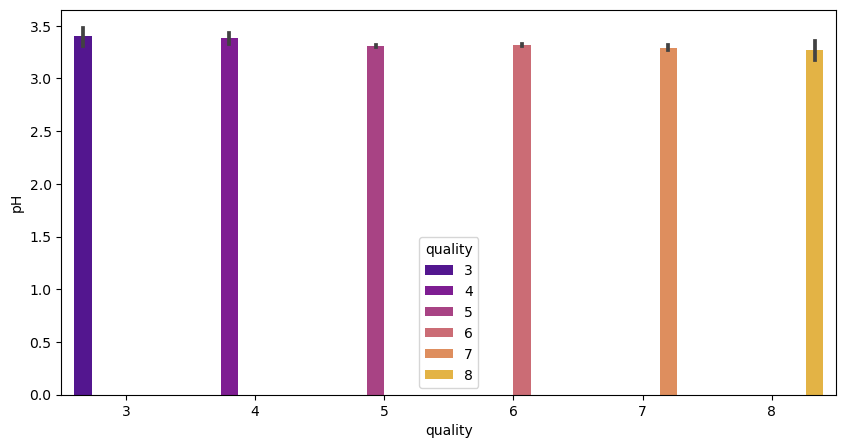

In [106]:
plt.figure(figsize=(10,5))
sns.barplot(x=target_variable,y=features['pH'],data=df,palette='plasma',hue=target_variable)
plt.show()

### From above Analysis 9) pH Vs quality=no pattern at all

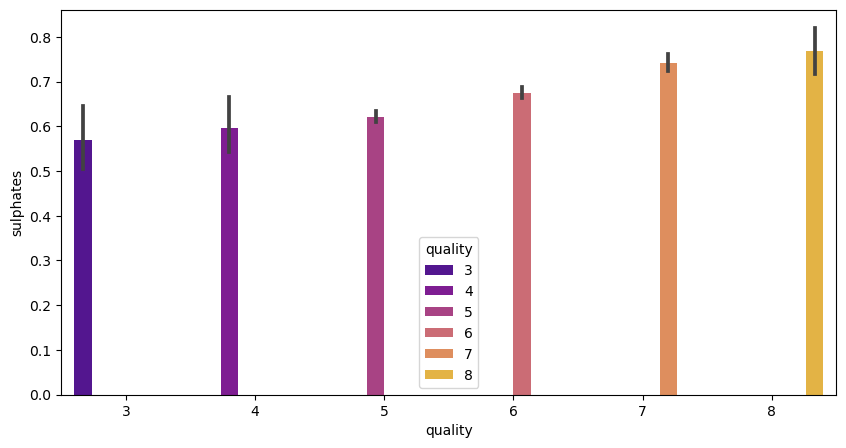

In [107]:
plt.figure(figsize=(10,5))
sns.barplot(x=target_variable,y=features['sulphates'],data=df,palette='plasma',hue=target_variable)
plt.show()

### From above Analysis 10) sulphates Vs quality=there is an increasing in trend

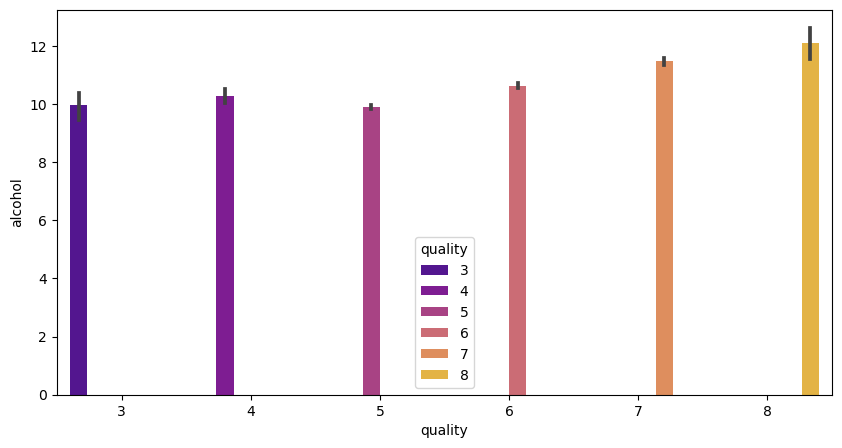

In [108]:
plt.figure(figsize=(10,5))
sns.barplot(x=target_variable,y=features['alcohol'],data=df,palette='plasma',hue=target_variable)
plt.show()

### From above Analysis 11) alcohol Vs quality=there is an increasing trend

# Now We can say to get better quality wine critic acid,sulphates and alcohol columns plays a major role because it has increasing trend

## Checking Outliers(using boxplot)

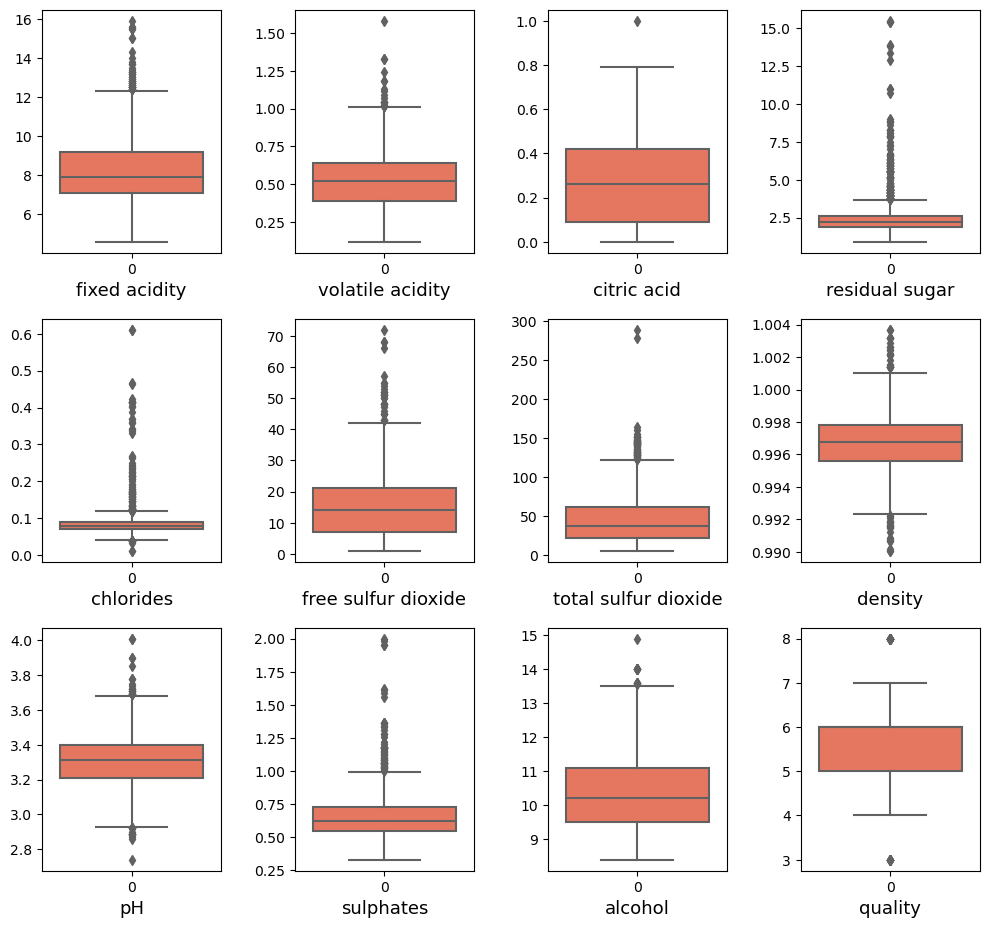

In [109]:
plt.figure(figsize=(10,12),facecolor ="white")
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column],palette="Reds")
        plt.xlabel(column,fontsize=13)
        plt.yticks(rotation=0,fontsize=10)
        plotnumber+=1
plt.tight_layout()
plt.show() 

**from above analysis we can see outliers presented clearly in the columns,retaining much data as possible from outliers**

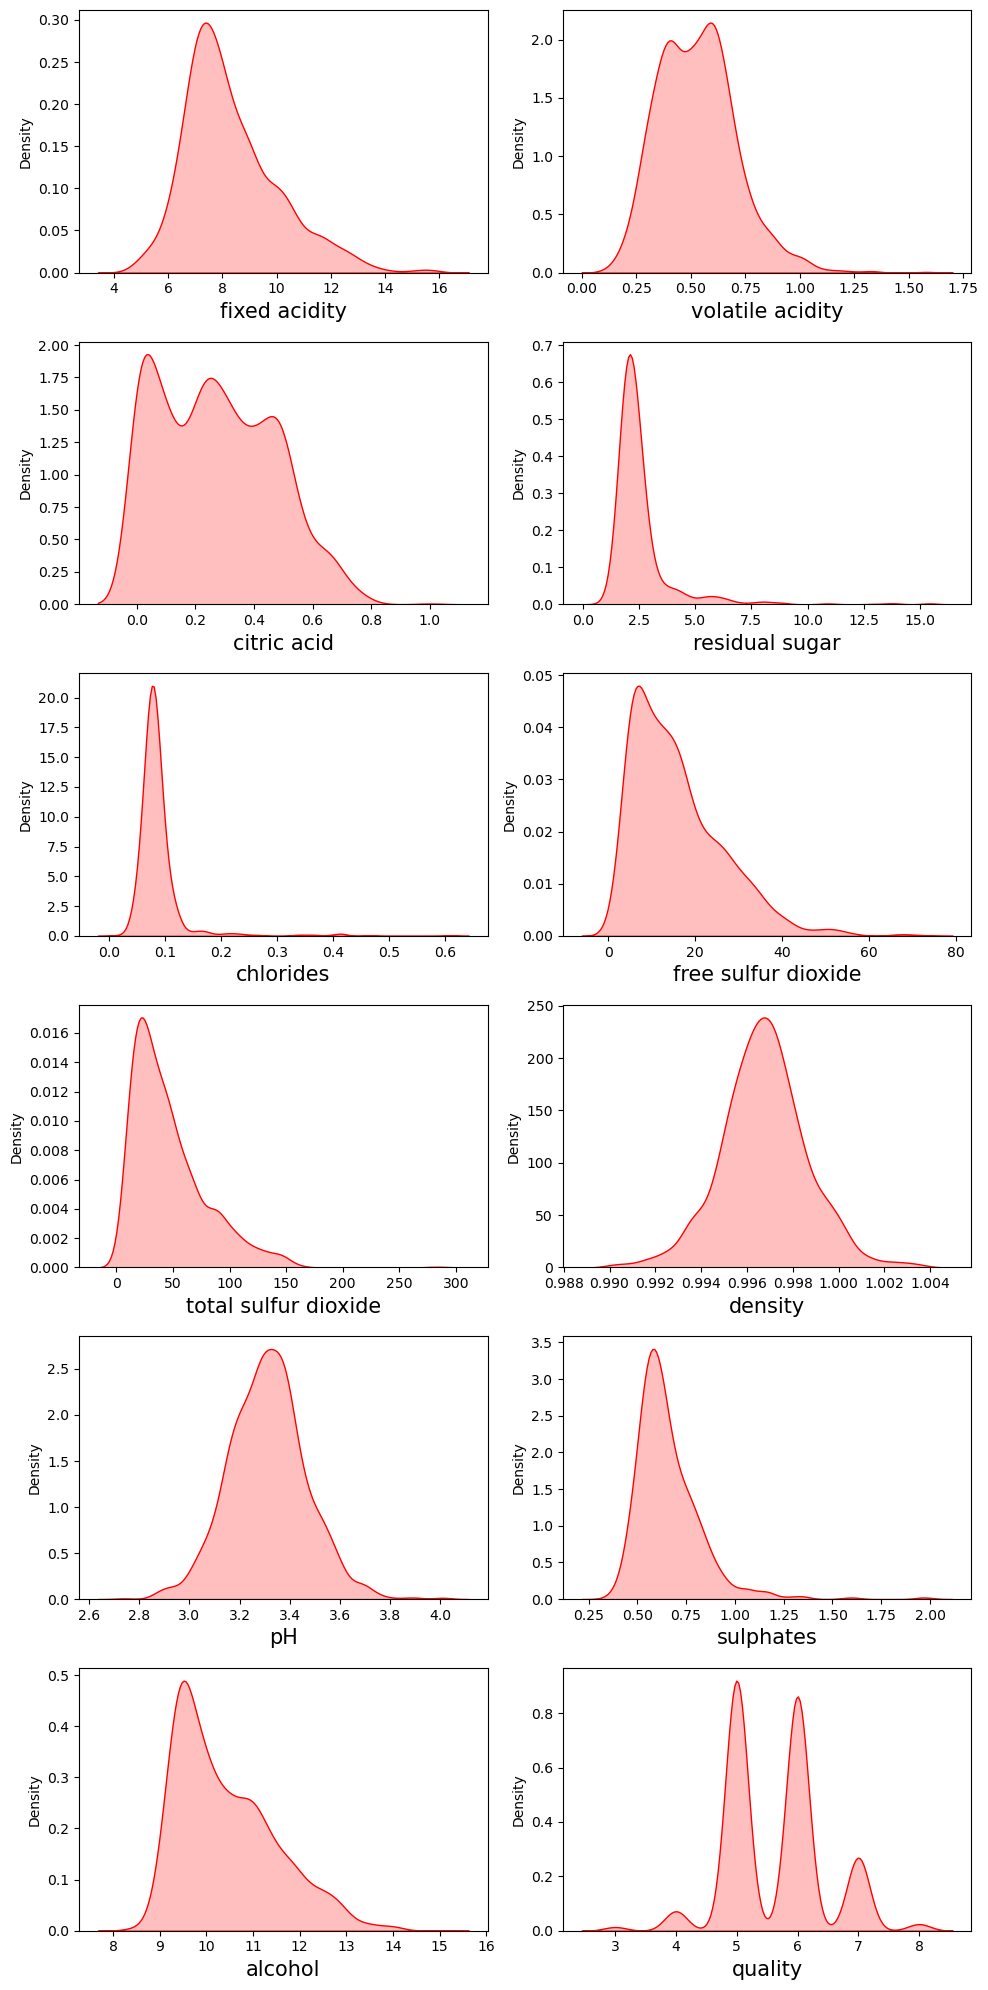

In [110]:
plt.figure(figsize=(10,20),facecolor ="white")
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax = plt.subplot(6,2,plotnumber)
        sns.distplot(df[column],color='r',hist=False,kde_kws={"shade":True})
        plt.xlabel(column,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)        
    plotnumber+=1
plt.tight_layout()
plt.show()

In [111]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

**From above analysis we can see some columns showing proper bell shape curve but some of them showing skewness ,the columns are critic acid,residual sugar,chlorides,free sulfur dioxide,total sulfar dioxide,sulphates and alcohol(showing skewness)**

**ignore the quality column(label) because it is categorical column**

**We will see before and after removal of outliers and skewness which makes our model performance best with help of accuracy score**

**from seeing model performance ,before and after removal of outliers and skewness ,model performance is good when the outliers and skewness are removed**

# Correlation Using heatmap

In [112]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


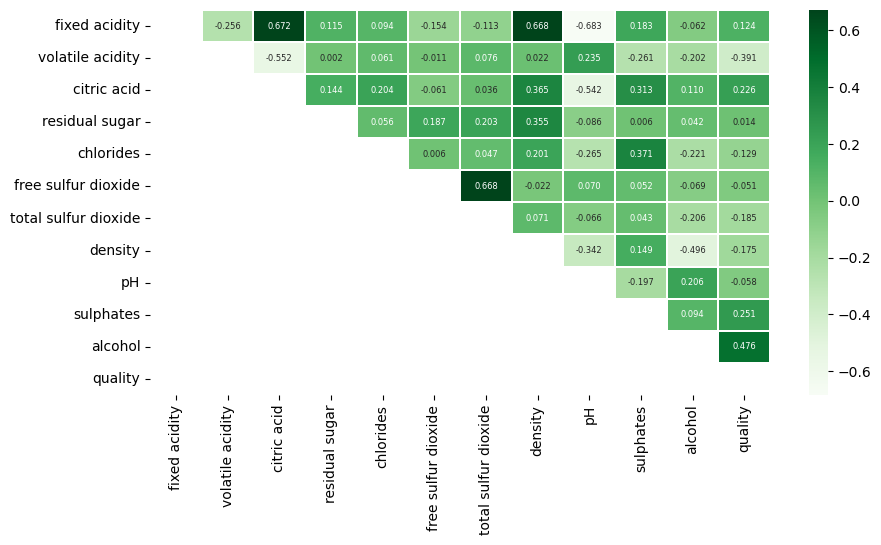

In [113]:
df_corr=df.corr()

lower_triangle=np.tril(df.corr())

plt.figure(figsize=(10,5))

sns.heatmap(df_corr,annot=True,annot_kws={"size":6},cmap='Greens',linewidths=0.1,fmt='.3f',mask=lower_triangle)

plt.show()

**==>0-no relation**

**==>-0.3 to 0.3 less relation**

**==>greater than -0.5 or 0.5 greater than(moderate correlation)**

**==>greater than -0.7 or 0.7 greater than(high correlation)**

**1) From  above heatmap we can see,there are positive correlation and negative correlation between label and feature columns**

**2)fixed acidity and citric acid are positively correlated with a value of 0.672 which is close to 1(high correlation)**

**3)fixed acidity and density are positively correlated with a value of 0.668 which is close to 1(high correlation)**

**4)free sulfur dioxide and total sulfur dioxide are positively correlated with a value of 0.668 which is close to 1(high correlation)**

**5)fixed acidity and pH are negatively correlated with a value of 0.683 which is close to 1(high correlation)**

**6) Droping free sulfar dioxide because it is correlated with total sulfar dioxide(each other)**

**7) we may need to deal multicollinearity if required to improve the accuracy of the model performance**

# Droping a Column(because two columns(free sulfur dioxide and total sulfur dioxide correlated with each other)

In [114]:
df=df.drop('free sulfur dioxide',axis=1)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5


In [115]:
df.shape

(1599, 11)

# Removal Of Outlier(using zscore method)

In [116]:
z=np.abs(zscore(df))
thresold=3
np.where(z>3)


(array([  13,   15,   17,   17,   19,   33,   38,   42,   43,   45,   81,
          81,   83,   86,   88,   91,   92,   95,  106,  106,  109,  120,
         126,  127,  142,  144,  147,  151,  151,  151,  151,  163,  164,
         169,  169,  181,  199,  226,  226,  240,  243,  244,  258,  258,
         274,  281,  291,  324,  325,  339,  340,  347,  354,  374,  381,
         391,  396,  400,  442,  442,  451,  459,  467,  480,  480,  494,
         515,  517,  544,  554,  554,  555,  555,  557,  557,  568,  588,
         591,  595,  608,  614,  636,  639,  649,  649,  651,  652,  652,
         652,  672,  672,  684,  690,  690,  692,  692,  695,  723,  724,
         730,  754,  776,  777,  795,  821,  832,  836,  837,  889,  899,
         911,  917,  923, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079,
        1079, 1081, 1081, 1111, 1114, 1165, 1186, 1235, 1244, 1244, 1260,
        1269, 1269, 1270, 1270, 1288, 1289, 1299, 1299, 1300, 1312, 1316,
        1319, 1319, 1321, 1367, 1370, 

In [117]:
df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [118]:
df.shape

(1464, 11)

**we can see there is lot of rows(which included outliers) have been removed**

# Separting features and labels(to build model)

In [119]:
x=df.drop('quality',axis=1)
y=df['quality']

In [120]:
y.value_counts()

quality
5    624
6    590
7    187
4     47
8     16
Name: count, dtype: int64

# OverSampling

## **we can see in target variable(y) the data are imbalanced so we have to take care of it**

In [121]:
y=y.apply(lambda y:1 if y>=7 else 0)

**we could see the data are balanced now**

**Based on the given question we turned quality column with different categories into 2 categories(7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.)**

**from this 0 stands for not good**

**1 stands for good**

In [122]:
SME=SMOTE()
x,y=SME.fit_resample(x,y)

In [123]:
y.value_counts()

quality
0    1261
1    1261
Name: count, dtype: int64

### we could see the data are balanced now

In [124]:
x #displaying feature

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
2517,7.405758,0.554375,0.111185,2.400000,0.052000,10.722038,0.993286,3.344441,0.671118,12.727796
2518,6.634113,0.379147,0.382971,1.927648,0.072085,24.000000,0.994247,3.374030,0.808501,11.272352
2519,7.800000,0.448047,0.233155,2.355259,0.088733,17.492487,0.997064,3.344775,0.676578,10.261269
2520,8.768245,0.491738,0.317855,5.152786,0.102292,10.394847,0.997184,3.309485,0.659742,11.370821


In [125]:
y #displaying label

0       0
1       0
2       0
3       0
4       0
       ..
2517    1
2518    1
2519    1
2520    1
2521    1
Name: quality, Length: 2522, dtype: int64

# Feature Scaling using Standard Scalarisation

In [126]:
scalar=StandardScaler()
x=pd.DataFrame(scalar.fit_transform(x),columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.669396,1.433275,-1.647785,-0.604676,-0.159843,-0.179024,0.776600,1.514884,-0.975702,-1.354766
1,-0.429987,2.562055,-1.647785,0.112323,0.953499,1.042108,0.217160,-0.745353,-0.044445,-0.988647
2,-0.429987,1.809535,-1.435976,-0.194963,0.649860,0.561056,0.329048,-0.307888,-0.277260,-0.988647
3,1.604990,-1.200544,1.317550,-0.604676,-0.210449,0.783080,0.888488,-1.036996,-0.820493,-0.988647
4,-0.669396,1.433275,-1.647785,-0.604676,-0.159843,-0.179024,0.776600,1.514884,-0.975702,-1.354766
...,...,...,...,...,...,...,...,...,...,...
2517,-0.665950,0.520058,-1.059036,-0.092534,-1.374398,-1.040401,-1.748923,0.307777,-0.113370,1.691162
2518,-1.127797,-0.578793,0.380139,-0.576357,-0.357953,-0.549064,-1.210844,0.523517,0.952781,0.358996
2519,-0.429987,-0.146724,-0.413171,-0.138362,0.484523,-0.789868,0.364800,0.310211,-0.071004,-0.566448
2520,0.149529,0.127261,0.035334,2.727101,1.170691,-1.052509,0.431785,0.052910,-0.201654,0.449124


# Checking Variance inflation factor (VIF)

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

vif

,VIF values,features
0,8.901778,fixed acidity
1,2.096234,volatile acidity
2,3.839790,citric acid
3,1.858115,residual sugar
4,1.234950,chlorides
5,1.181812,total sulfur dioxide
6,7.962058,density
7,3.681293,pH
8,1.429608,sulphates
9,4.284937,alcohol


**If VIF value is greater than 10,consider it as a sign of multicollinearity but our features does not have the value greater than 10**

# Creating train test split

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=1)

# Creating a Function with accuracy score,classification report and difference between accuracy score and cross validation 

In [134]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================Train Result=============")
        
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")  #accuracy score for train result
              
    
    elif train==False:
        pred=clf.predict(x_test)
              
        print("\n================Test Result=============")
        
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")  #accuracy score for test result
              
        print("\n \n Test Classification Report \n",classification_report(y_test,pred,digits=2)) #classification result for test result
        
        
        score=cross_val_score(clf,x,y)
        print(score)
        print(score.mean())
        print("Difference between accuracy score and cross validation is:",accuracy_score(y_test,pred)-score.mean()) #Difference between accuracy score and cross validation(to find which model is best)

# LogisticRegression

In [135]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [136]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:83.03%

================Test Result=============
Accuracy Score:96.67%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[0.87128713 0.7980198  0.85119048 0.74007937 0.82142857]
0.8164010686782964
Difference between accuracy score and cross validation is: 0.15026559798837025


# RandomForestClassifier

In [137]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [138]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
Accuracy Score:100.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[0.93465347 0.87128713 0.92857143 0.86111111 0.90674603]
0.9004738330975955
Difference between accuracy score and cross validation is: 0.09952616690240446


# SVC

In [139]:
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [140]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:90.29%

================Test Result=============
Accuracy Score:93.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[0.92475248 0.83762376 0.89087302 0.80753968 0.87698413]
0.8675546126041176
Difference between accuracy score and cross validation is: 0.06577872072921576


# GradientBoostingClassifier

In [141]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [142]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:94.14%

================Test Result=============
Accuracy Score:96.67%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[0.87722772 0.83366337 0.92063492 0.82539683 0.87896825]
0.8671782178217822
Difference between accuracy score and cross validation is: 0.0994884488448845


# AdaBoostClassifier

In [143]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [144]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:87.44%

================Test Result=============
Accuracy Score:90.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.92      0.86      0.89        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

[0.84752475 0.84356436 0.88095238 0.78174603 0.84126984]
0.839011472575829
Difference between accuracy score and cross validation is: 0.060988527424171046


# ExtraTreesClassifier

In [145]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [146]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
Accuracy Score:93.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

[0.96831683 0.89108911 0.9265873  0.86309524 0.91865079]
0.9135478547854785
Difference between accuracy score and cross validation is: 0.01978547854785484


# BaggingClassifier

In [147]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [148]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:99.64%

================Test Result=============
Accuracy Score:96.67%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[0.91683168 0.87722772 0.91666667 0.86706349 0.90674603]
0.8969071192833569
Difference between accuracy score and cross validation is: 0.0697595473833098


# Desicion Tree Classifier

In [149]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [150]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
Accuracy Score:93.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

[0.87524752 0.82772277 0.89484127 0.82936508 0.86706349]
0.8588480276599089
Difference between accuracy score and cross validation is: 0.07448530567342448


### Checking Difference between accuracy score and cross validation,the model ExtraTreeClassifier has lowest value so ExtratressClassifier is our best model.

# HyperParameter Tuning

In [152]:
parameters={'criterion':['gini','entropy'],
           'random_state':[10,50,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}

In [154]:
GV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [155]:
GV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [156]:
GV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 50}

# Final Model

In [158]:
final_model=ExtraTreesClassifier(criterion= 'entropy',
 max_depth= 20,
 n_estimators= 50,
 n_jobs= -2,
 random_state= 50)

In [162]:
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

96.66666666666667


# Threshold

In [164]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)

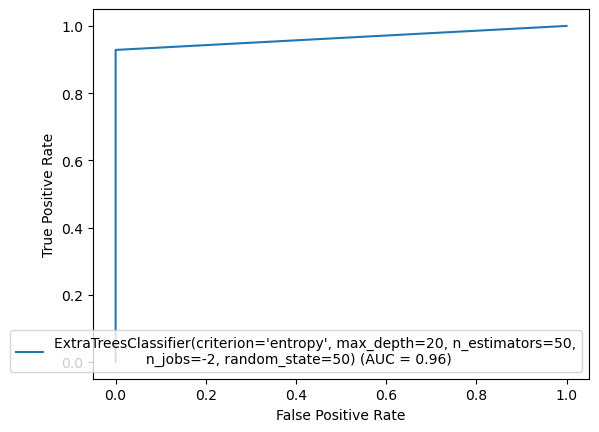

In [165]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

# Saving the model

In [166]:
joblib.dump(final_model,'Red Wine Quality Prediction.pkll')

['Red Wine Quality Prediction.pkll']

# Predicting the saved Model

In [167]:
model=joblib.load('Red Wine Quality Prediction.pkll')

In [169]:
prediction=model.predict(x_test)
prediction

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [171]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,0,0
7,1,1
8,0,0
9,0,0
